<a href="https://colab.research.google.com/github/miloskow/jezyk_python/blob/main/Zadanie1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beautiful Soup
Biblioteka do Pythona.
https://www.crummy.com/software/BeautifulSoup/bs4/doc/

In [1]:
import json
import re
import pandas as pd
import urllib
from urllib.request import Request
from bs4 import BeautifulSoup

Pobieramy html z zegluj.pl i wstępnie procesujemy przez Beautiful Soup.

Trzeba sprawdzić ile jest stron w wynikach, można to napisać ładnie, żeby samo się analizowało, na podstawie klasy disabled (lub jej braku) na elemencie następna strona.

In [6]:
url = "https://zegluj.pl/mazury?date_from=15-06-2025&date_to=25-06-2025&page="

pages = []
for page_number in range(1, 18):
    print(f'Pobieranie strony {page_number}')
    with urllib.request.urlopen(f'{url}{page_number}') as resp:
        processed_page = BeautifulSoup(resp.read().decode('utf-8'), "html.parser")
        pages.append(processed_page)


Pobieranie strony 1
Pobieranie strony 2
Pobieranie strony 3
Pobieranie strony 4
Pobieranie strony 5
Pobieranie strony 6
Pobieranie strony 7
Pobieranie strony 8
Pobieranie strony 9
Pobieranie strony 10
Pobieranie strony 11
Pobieranie strony 12
Pobieranie strony 13
Pobieranie strony 14
Pobieranie strony 15
Pobieranie strony 16
Pobieranie strony 17


In [ ]:
pages[3]

<!DOCTYPE html>

<html lang="pl" xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>⚓ Czarter jachtów Mazury 2025. Wynajem jachtów na Mazurach - zegluj.pl</title>
<meta content="Czarter jachtów Mazury - 2025. Jachty motorowe, houseboaty oraz żaglówki do czarteru na Mazurach. Porównaj ofertę 130 firm czarterowych, wybierz najlepszą ofertę. Na zegluj.pl znajdziesz najlepsze ceny czarterów oraz oferty last minute. Mazurskie jeziora" name="description"/>
<meta content="czarter, mazury" name="keywords"/>
<meta content="index, follow" name="robots"/>
<link href="https://zegluj.pl/mazury" rel="canonical"/>
<meta content="zegluj.pl | czartery jachtów. Porównaj oferty firm czarterowych. Rabaty do 30%." property="og:title"/>
<meta content="/assets/fb_zegluj-b6311e80fada9f469076f632f87ee111.jpg" property="og:image"/>
<meta content="Proste wyszukiwanie, szybka rezerwacja, intuicyjne określenie wolnych terminów, tylko dostępne oferty. Nowa jakość i wielkość oferty. Kochasz żeglarstwo? Znajdź coś d

Wyciągamy poszczególne boksy z łódkami




In [7]:
full_yacht_data = []
for page in pages:

    full_yacht_data += page.find_all(class_='yacht-box')

In [8]:
full_yacht_data

[<div class="yacht-box">
 <div class="row">
 <div class="col-md-4 yacht-box__column yacht-box__column--overflowed">
 <div class="yacht-box__image">
 <a href="/jacht/pegaz-696/457#/avail/date_from=15-06-2025/date_to=25-06-2025/"><div class="yacht-box__perfect-customer-service"></div>
 <img alt="Mazury czarter - Pegaz 696" src="/system/yacht_cms_images/images/000/002/349/medium/pegaz-696-1668788583.jpg?1668788583"/>
 </a><div class="yacht-box__location">
 <blockquote>Jora Wielka, port Kokoszka</blockquote>
 </div>
 </div>
 </div>
 <div class="col-md-8 yacht-box__column">
 <div class="yacht-box__content">
 <div class="row">
 <div class="col-sm-7 yacht-box-content__left">
 <div class="yacht-box__title">
 <h3 class="yacht-box__name">
 Pegaz 696
 </h3>
 <div class="yacht-box__votescounter">
 <div id="details_more_info"></div>
 <a class="yacht-box__votes" href="/jacht/pegaz-696/457/yacht_reviews#/avail/date_from=15-06-2025/date_to=25-06-2025/" rel="nofollow" title="21 - tyle osób czarterowała

In [30]:
yachts_data = []
for yacht_html in full_yacht_data:
    yacht = {}
    yacht['name'] = yacht_html.find(class_="yacht-box__name").text.strip()
    yacht['price'] = float(yacht_html.find(class_="price right").span.contents[0].replace(' ', '').replace('zł', '').replace('PLN', ''))
    yacht['img'] = f"https://zegluj.pl{yacht_html.img['src']}"
    yacht['url'] = f"https://zegluj.pl{yacht_html.find(class_='yacht-box__image').a['href']}"
    # parameters
    for param_row in yacht_html.select('li.yacht-box-info__item'):
        param_data = param_row.find_all('div')
        param_type = param_data[0].text.strip()
        param_value = re.sub(r'\s+', '', param_data[1].text.strip())
        if 'osób' in param_type:
            #yacht['people'] = param_value
            try:
              yacht['people'] = int(param_value.split('-')[-1])
            except ValueError:
              yacht['people'] = None
        elif 'kabin' in param_type:
            try:
                yacht['cabins'] = int(param_value.split('-')[-1])
            except ValueError:
                yacht['cabins'] = None
            # yacht['cabins'] = int(param_value)
        elif 'produkcji' in param_type:
            yacht['year'] = param_value

    yachts_data.append(yacht)

In [23]:
yachts_data

[{'name': 'Pegaz 696',
  'price': 2008.0,
  'img': 'https://zegluj.pl/system/yacht_cms_images/images/000/002/349/medium/pegaz-696-1668788583.jpg?1668788583',
  'url': 'https://zegluj.pl/jacht/pegaz-696/457#/avail/date_from=15-06-2025/date_to=25-06-2025/',
  'people': 4,
  'cabins': 1,
  'year': '2000'},
 {'name': 'Sasanka 620',
  'price': 2220.0,
  'img': 'https://zegluj.pl/system/yacht_cms_images/images/000/034/738/medium/sasanka-620-1743509176.png?1743509171',
  'url': 'https://zegluj.pl/jacht/sasanka-620/2413#/avail/date_from=15-06-2025/date_to=25-06-2025/',
  'people': 4,
  'cabins': 0,
  'year': '2007'},
 {'name': 'Tes 678 BT',
  'price': 2499.0,
  'img': 'https://zegluj.pl/system/yacht_cms_images/images/000/004/780/medium/tes-678-bt-1668789887.jpg?1668789887',
  'url': 'https://zegluj.pl/jacht/tes-678-bt/671#/avail/date_from=15-06-2025/date_to=25-06-2025/',
  'people': 6,
  'cabins': 0,
  'year': '2015'},
 {'name': 'Texas 540',
  'price': 3391.0,
  'img': 'https://zegluj.pl/syste

Możemy dalej analizować pozyskane dane.

In [10]:
df = pd.DataFrame.from_dict(yachts_data)
df['cabins'].fillna(0, inplace=True)
df.head(5)

<ipython-input-10-8ce21c67e9ea>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cabins'].fillna(0, inplace=True)


,name,price,img,url,people,cabins,year
0,Pegaz 696,2008.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/pegaz-696/457#/avail/d...,4,1,2000
1,Sasanka 620,2220.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/sasanka-620/2413#/avai...,4,0,2007
2,Tes 678 BT,2499.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/tes-678-bt/671#/avail/...,6,0,2015
3,Texas 540,3391.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/texas-540/990#/avail/d...,6,0,2022
4,Antila 24,3458.0,https://zegluj.pl/assets/no_photo-c6beb90bfa91...,https://zegluj.pl/jacht/antila-24/2429#/avail/...,8,0,2008


array([[<Axes: title={'center': 'price'}>]], dtype=object)

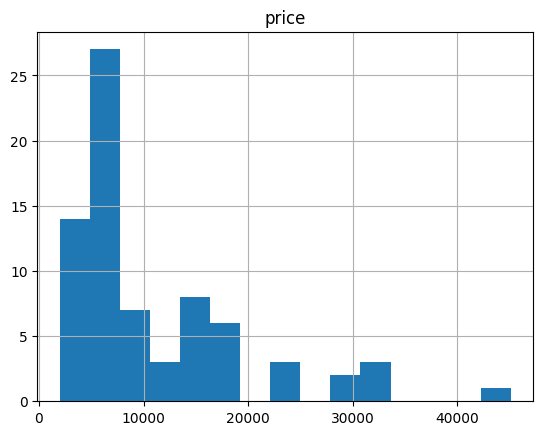

In [11]:
df.hist(column='price', bins=15)

In [12]:
df[ df.price > 10000 ] # 100_000

,name,price,img,url,people,cabins,year
24,AM 565,11000.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/am-565/1191#/avail/dat...,7,1,2021
25,Sea-Doo Spark 3up 90,13000.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/sea-doo-spark-3up-90/3...,2,0,2019
26,Sea-Doo GTI SE 170,14200.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/sea-doo-gti-se-170/218...,3,0,2023
27,Sea-Doo GTX 170,14200.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/sea-doo-gtx-170/2183#/...,3,0,2023
28,Sea-Doo Wake 170,14200.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/sea-doo-wake-170/2426#...,3,0,2023
29,ST Tropez 6,15240.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/st-tropez-6/1279#/avai...,5,1,2018
30,Merry Fisher 795 S2,16000.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/merry-fisher-795-s2/13...,9,1,2022
31,Sea-Doo GTX 230,16200.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/sea-doo-gtx-230/1877#/...,3,0,2023
32,Sea-Doo GTR 230,16200.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/sea-doo-gtr-230/2425#/...,3,0,2023
33,Sea-Doo RXT-X 300,18200.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/sea-doo-rxt-x-300/2188...,3,0,2021


array([[<Axes: title={'center': 'price'}>]], dtype=object)

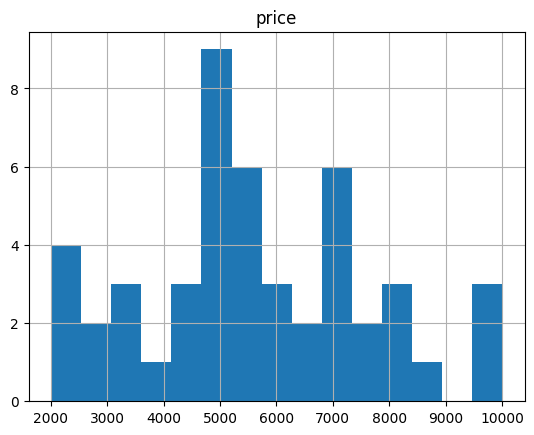

In [13]:
df[ df.price <= 10000 ].hist(column='price', bins=15)

array([[<Axes: title={'center': 'people'}>]], dtype=object)

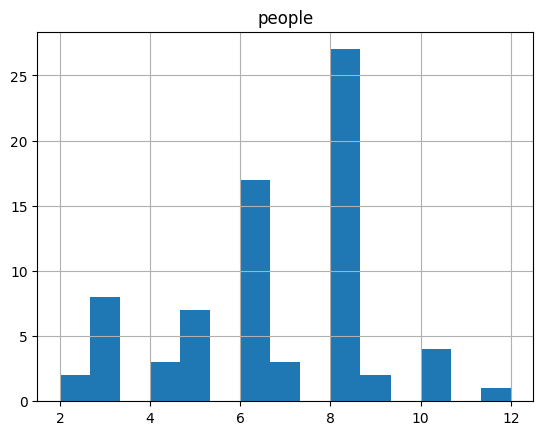

In [14]:
df.hist(column='people', bins=15)

<Axes: xlabel='people', ylabel='price'>

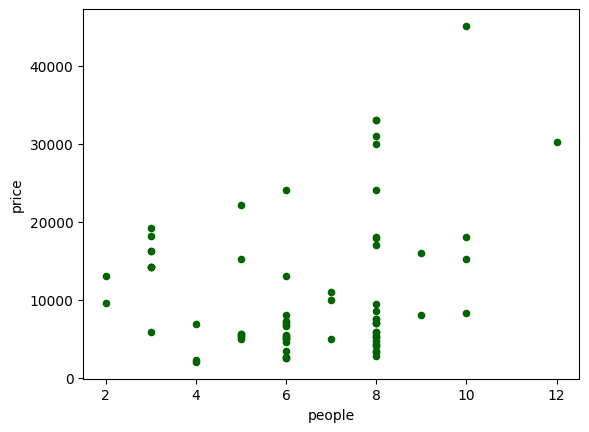

In [15]:
df.plot.scatter(x='people', y='price', c='DarkGreen' )

In [18]:
boat_counts = df['name'].value_counts()

In [19]:
boat_counts

,count
name,
Maxus 24 Evo,5
Janmor 700,5
Maxus 28,5
Calipso 23,2
Sea-Doo Spark 3up 90,2
Antila 27,2
Sea Ray Sundancer 265,2
Antila 24.4,2
Nautika 830,2


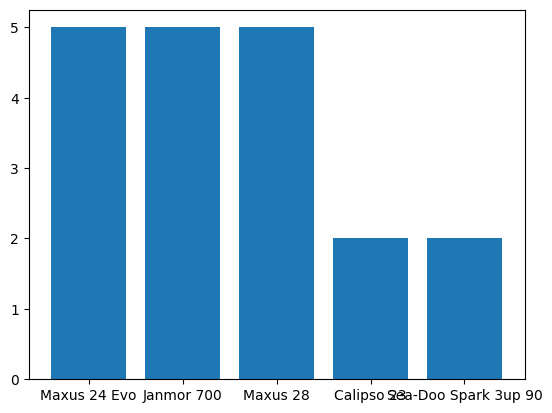

In [20]:
top5=boat_counts[:5]
import matplotlib.pyplot as plt
plt.bar(top5.index, top5.values,  width = 0.8)
plt.title='Top 5 most frequent boats'
plt.show()

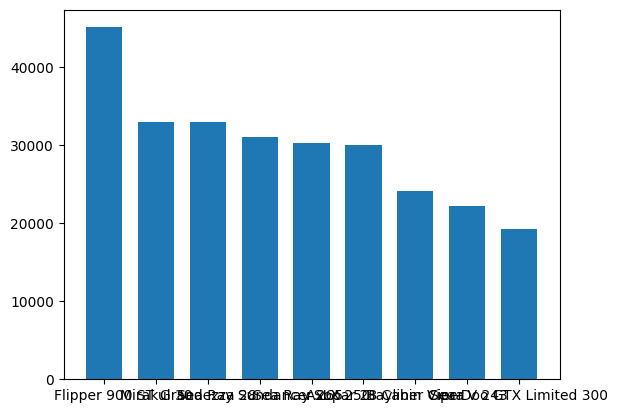

In [21]:
prices_df = df.sort_values(by='price',ascending=False)
prices_df=prices_df.head(10)
plt.bar(prices_df['name'], prices_df['price'],  width = 0.7)
plt.title='Most expensive boats'


** ZADANIE 1 - ROZSZERZENIE WIZUALIZACJI**

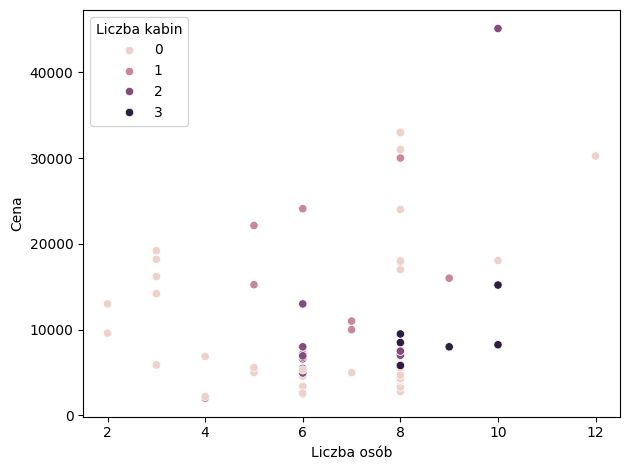

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x="people", y="price", hue="cabins")
plt.title="Cena a liczba osób"
plt.xlabel("Liczba osób")
plt.ylabel("Cena")
plt.legend(title="Liczba kabin", loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-29-fcef90cebf4e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='price_per_person', y='name', palette='magma')


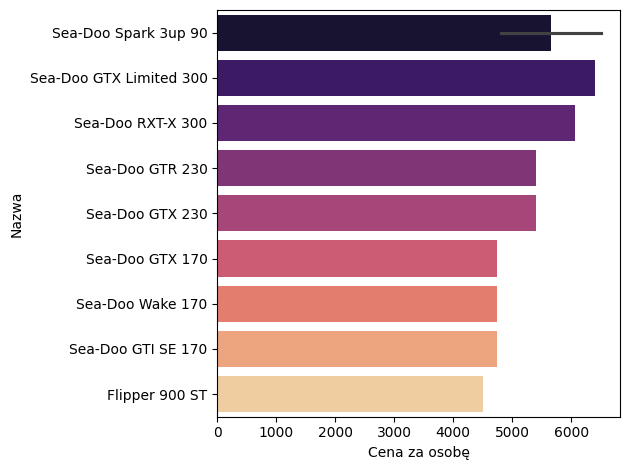

In [29]:
df['price_per_person'] = df['price'] / df['people']
top10 = df.sort_values('price_per_person', ascending=False).head(10)

sns.barplot(data=top10, x='price_per_person', y='name', palette='magma')
plt.title= 'Top 10 – Cena na osobę'
plt.xlabel('Cena za osobę')
plt.ylabel('Nazwa')
plt.tight_layout()
plt.show()


In [37]:
for index, row in df.iterrows():
    try:
        url = row["url"]
        print(url)
        with urllib.request.urlopen(row["url"]) as resp:
            processed_page = BeautifulSoup(resp.read().decode('utf-8'), "html.parser")

            yacht_subpage_data = processed_page.find_all(
                class_="yacht-details__section yacht-details__section--tabs"
            )

            div_with_bathrooms = processed_page.find(
                'div',
                string=lambda text: text and text.startswith('Liczba łazienek:')
            )

            if div_with_bathrooms:
                text = div_with_bathrooms.get_text(strip=True)
                liczba_lazienek = int(text.split(':')[1].strip())
            else:
                liczba_lazienek = None

            ratings = processed_page.find_all(class_="avg_rating")
            valid_ratings = []

            for rating in ratings:
                rating_text = rating.get_text(strip=True).replace(' ', '').replace(',', '.')
                if rating_text:
                    try:
                        valid_ratings.append(float(rating_text))
                    except ValueError:
                        continue

            average_ratings = (
                sum(valid_ratings) / len(valid_ratings) if valid_ratings else None
            )

            df.at[index, 'liczba_lazienek'] = liczba_lazienek
            df.at[index, 'average_ratings'] = average_ratings

    except Exception as e:
        print(f"Error processing row {index}: {e}")


https://zegluj.pl/jacht/pegaz-696/457#/avail/date_from=15-06-2025/date_to=25-06-2025/
https://zegluj.pl/jacht/sasanka-620/2413#/avail/date_from=15-06-2025/date_to=25-06-2025/
https://zegluj.pl/jacht/tes-678-bt/671#/avail/date_from=15-06-2025/date_to=25-06-2025/
https://zegluj.pl/jacht/texas-540/990#/avail/date_from=15-06-2025/date_to=25-06-2025/
https://zegluj.pl/jacht/antila-24/2429#/avail/date_from=15-06-2025/date_to=25-06-2025/
https://zegluj.pl/jacht/calipso-23/1322#/avail/date_from=15-06-2025/date_to=25-06-2025/
https://zegluj.pl/jacht/calipso-23/1323#/avail/date_from=15-06-2025/date_to=25-06-2025/
https://zegluj.pl/jacht/maxus-24-evo/743#/avail/date_from=15-06-2025/date_to=25-06-2025/
https://zegluj.pl/jacht/maxus-24-evo/744#/avail/date_from=15-06-2025/date_to=25-06-2025/
https://zegluj.pl/jacht/janmor-700/573#/avail/date_from=15-06-2025/date_to=25-06-2025/
https://zegluj.pl/jacht/escapade-600/1848#/avail/date_from=15-06-2025/date_to=25-06-2025/
https://zegluj.pl/jacht/calipso-75

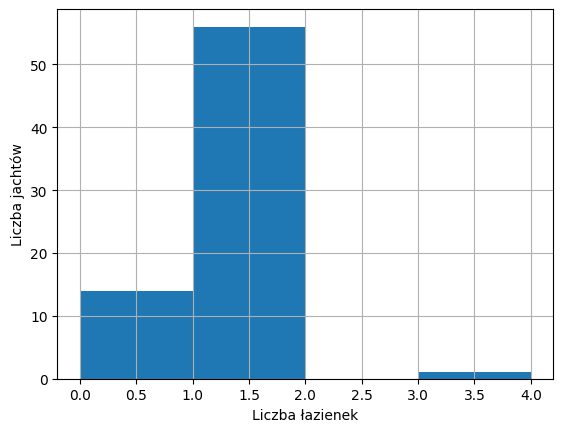

In [39]:
df['liczba_lazienek'].hist(bins=range(int(df['liczba_lazienek'].max()) + 2))
plt.xlabel('Liczba łazienek')
plt.ylabel('Liczba jachtów')
plt.title='Rozkład liczby łazienek'
plt.show()


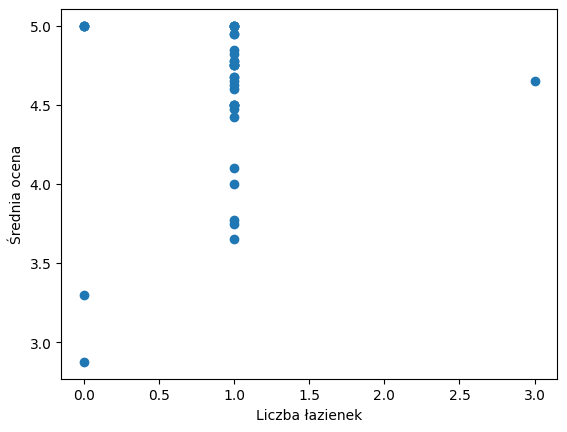

In [40]:
plt.scatter(df['liczba_lazienek'], df['average_ratings'])
plt.xlabel('Liczba łazienek')
plt.ylabel('Średnia ocena')
plt.title='Zależność oceny od liczby łazienek'
plt.show()
